In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1) # Gives the random number between 0 and 1

In [3]:
X.shape
X.size


100

In [4]:
y = 4 + 3*X + np.random.randn(100,1) # Give the random number that gives gaussion distribution

## Visualization (Histogram)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

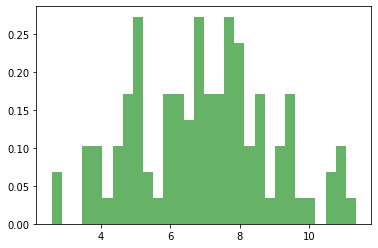

In [6]:
plt.hist(y, bins =30 , density =True , alpha = 0.6 , color = "green")
plt.show()

<Axes: ylabel='Density'>

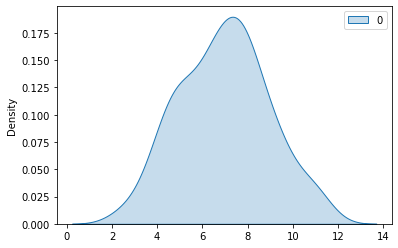

In [7]:
sns.kdeplot(y, fill = True , color = "skyblue")

### Peaks in the KDE plot indicates regions where data is more concentreated, valleys indicates less frequent datapoint , the area under the kde plot sums to 1, just like a probability distribution.
### PDF stands for probability density function its a concept from probability theory and statistics that tells us how likely a contineous random variable is to take on a particulat value. It is a curve that shows the relative likelyhood of different outcomes. For continuous variables, the probability at a single point is 0.|Only areas under the curve over intervals have meaning (like P(a ≤ X ≤ b)).


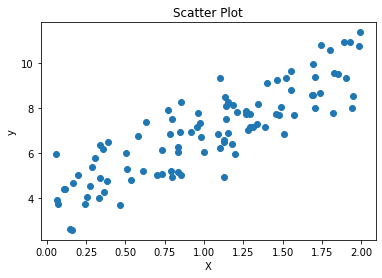

In [8]:
plt.scatter(X,y)
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Calculating the Parameters
X_b = np.c_[np.ones((100,1)),X]
# np.c_ concatenates the arrays column wise
# It adds a columns of 1s to the left of the array X this is done when you are doing linear regression using matrix operation

In [10]:
theta_best  = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.83848143],
       [3.03498852]])

In [12]:
# Making new prediction using theta
X_test = np.array([[0],[2]])

In [13]:
X_test_b = np.c_[np.ones((2,1)), X_test] # we are making an entire column of 1 for bias term
# y = theta1*1 + theta2*X1

In [15]:
prediction = X_test_b.dot(theta_best.T) 

ValueError: shapes (2,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [16]:
prediction

NameError: name 'prediction' is not defined

In [17]:
X_test_b.shape

(2, 2)

In [18]:
plt.plot(X_test,prediction, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,20]) # This will give the axis value for X followed by Y axis
plt.show()

NameError: name 'prediction' is not defined

In [19]:
# Performing the Linear Regression using the Scikit Learn is Simple
import time
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_
lin_reg.intercept_
start = time.time()
lin_reg.predict([[0],[5], [7], [8],[67]])
end = time.time()
# The Sklearn use the Pseudoinvrese method in order to reduce the time complexixity for the calculation

In [20]:
end -start

0.0001571178436279297

In [21]:
# making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.



In [25]:
# Implemention of Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100 # Total no of instances
theta = np.random.randn(2,1)
theta_path = []
cost_history = []

for i in range(n_iterations):
    gredint = 2/m *X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gredint
    theta_path.append(theta.copy())
    print(f"Iteraion :: {i} , theta = {theta}")
    
    cost = np.mean((X_b.dot(theta) - y) ** 2)
    cost_history.append(cost)

Iteraion :: 0 , theta = [[2.46476091]
 [0.78209619]]
Iteraion :: 1 , theta = [[3.20136629]
 [1.67541133]]
Iteraion :: 2 , theta = [[3.60751371]
 [2.17516902]]
Iteraion :: 3 , theta = [[3.82997725]
 [2.4559721 ]]
Iteraion :: 4 , theta = [[3.95038117]
 [2.61492645]]
Iteraion :: 5 , theta = [[4.01411737]
 [2.70603872]]
Iteraion :: 6 , theta = [[4.04642757]
 [2.75934631]]
Iteraion :: 7 , theta = [[4.06134723]
 [2.79155631]]
Iteraion :: 8 , theta = [[4.06667966]
 [2.81196219]]
Iteraion :: 9 , theta = [[4.06676222]
 [2.82573441]]
Iteraion :: 10 , theta = [[4.06400486]
 [2.83575036]]
Iteraion :: 11 , theta = [[4.05974562]
 [2.84361211]]
Iteraion :: 12 , theta = [[4.0547265 ]
 [2.85021248]]
Iteraion :: 13 , theta = [[4.04935808]
 [2.85604971]]
Iteraion :: 14 , theta = [[4.04386666]
 [2.86140263]]
Iteraion :: 15 , theta = [[4.03837613]
 [2.86642794]]
Iteraion :: 16 , theta = [[4.03295348]
 [2.87121441]]
Iteraion :: 17 , theta = [[4.0276341 ]
 [2.87581297]]
Iteraion :: 18 , theta = [[4.02243585]

In [26]:
theta

array([[3.83848143],
       [3.03498852]])

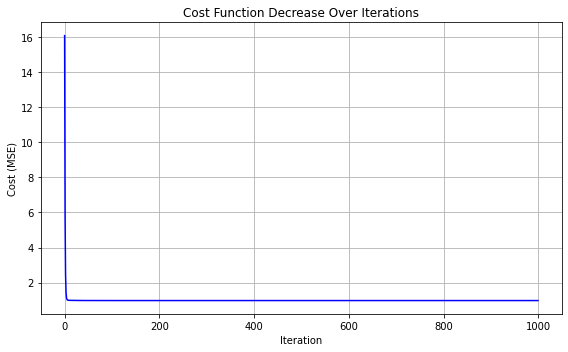

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(n_iterations), cost_history, color='blue')
plt.title("Cost Function Decrease Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# TO find the good learning rate we can use grid search

# Stochastic Gradient Descent

In [ ]:
# Stochastic gradinet descent picks a random instance in the training set at every step and computes
# the gradients based only on that single instance. Due to its random nature this algorithm is 
# much less regular then the batch gradient descent, instead of gently decreasing until it reaches
# minimum the cost function will bounce up and down decreasing only on average.

#### Decreasing the Learing rate at each iteration

In [ ]:
# The function that determines the learning rate at each iteration is called learning schedule.


In [63]:
# Code implementation of Stochastic Gradient Descent using simple learing schedule
n_epochs = 50 
t0 ,t1 = 5,10   # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t+t1)

theta2 = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m +i)
        theta2 = theta - eta*gradients
        

In [64]:
xi.shape

(1, 2)